In [16]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [18]:
vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [19]:
path_data = "../../results_explored_by_task/toxic/"
list_documents = os.listdir(path_data)
len(list_documents)

24

In [20]:
list_df = []

for encoder in list_documents:
    list_explored = os.listdir(f"{path_data}{encoder}")
    for element in list_explored:

        df_data = pd.read_csv(f"{path_data}{encoder}/{element}")
        df_data['encoder'] = encoder
        list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.602837,0.600787,0.605425,0.602837,0.208510,0.005044,0.091070,0.600773,0.603041,0.605407,0.603041,2796,Group_4
1,DecisionTree,0.702522,0.702328,0.702895,0.702522,0.405338,0.118555,0.006075,0.689216,0.689358,0.689760,0.689358,2796,Group_4
2,Bagging,0.763199,0.763005,0.764293,0.763199,0.527550,0.771299,0.009679,0.755150,0.755236,0.755562,0.755236,2796,Group_4
3,RandomForest,0.797478,0.797401,0.798101,0.797478,0.595612,0.927956,0.032328,0.792215,0.792230,0.792314,0.792230,2796,Group_4
4,ExtraTrees,0.773050,0.772639,0.775366,0.773050,0.548498,0.802509,0.042606,0.769445,0.769595,0.770240,0.769595,2796,Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.878251,0.878214,0.878348,0.878251,0.756448,149.863729,0.015393,0.871892,0.871959,0.873157,0.871959,7992,prottrans_uniref
7,Hist Gradient Boosting,0.892829,0.892734,0.893449,0.892829,0.786095,17.081229,0.025664,0.883368,0.883446,0.884933,0.883446,7992,prottrans_uniref
8,SVC,0.491726,0.392087,0.500380,0.491726,0.000195,15.804639,4.769828,0.395149,0.506081,0.456300,0.506081,7992,prottrans_uniref
9,Gaussian Process,0.548463,0.546887,0.550747,0.548463,0.100123,64.025890,10.259046,0.557964,0.559122,0.559316,0.559122,7992,prottrans_uniref


In [21]:
df_results["overffiting_accuracy"] = df_results["validation_accuracy"]/df_results["train_accuracy"]
df_results["overffiting_f1"] = df_results["validation_f1_score"]/df_results["train_f1_weighted"]
df_results["overffiting_precision"] = df_results["validation_precision"]/df_results["train_precision_weighted"]
df_results["overffiting_recall"] = df_results["validation_recall"]/df_results["train_recall_weighted"]
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder,overffiting_accuracy,overffiting_f1,overffiting_precision,overffiting_recall
0,KNeighbors,0.602837,0.600787,0.605425,0.602837,0.208510,0.005044,0.091070,0.600773,0.603041,0.605407,0.603041,2796,Group_4,0.999662,1.000023,1.000030,0.999662
1,DecisionTree,0.702522,0.702328,0.702895,0.702522,0.405338,0.118555,0.006075,0.689216,0.689358,0.689760,0.689358,2796,Group_4,1.019095,1.019025,1.019044,1.019095
2,Bagging,0.763199,0.763005,0.764293,0.763199,0.527550,0.771299,0.009679,0.755150,0.755236,0.755562,0.755236,2796,Group_4,1.010544,1.010401,1.011556,1.010544
3,RandomForest,0.797478,0.797401,0.798101,0.797478,0.595612,0.927956,0.032328,0.792215,0.792230,0.792314,0.792230,2796,Group_4,1.006625,1.006546,1.007304,1.006625
4,ExtraTrees,0.773050,0.772639,0.775366,0.773050,0.548498,0.802509,0.042606,0.769445,0.769595,0.770240,0.769595,2796,Group_4,1.004489,1.004151,1.006656,1.004489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.878251,0.878214,0.878348,0.878251,0.756448,149.863729,0.015393,0.871892,0.871959,0.873157,0.871959,7992,prottrans_uniref,1.007215,1.007252,1.005946,1.007215
7,Hist Gradient Boosting,0.892829,0.892734,0.893449,0.892829,0.786095,17.081229,0.025664,0.883368,0.883446,0.884933,0.883446,7992,prottrans_uniref,1.010621,1.010603,1.009624,1.010621
8,SVC,0.491726,0.392087,0.500380,0.491726,0.000195,15.804639,4.769828,0.395149,0.506081,0.456300,0.506081,7992,prottrans_uniref,0.971634,0.992250,1.096604,0.971634
9,Gaussian Process,0.548463,0.546887,0.550747,0.548463,0.100123,64.025890,10.259046,0.557964,0.559122,0.559316,0.559122,7992,prottrans_uniref,0.980937,0.980148,0.984680,0.980937


In [22]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_validation = df_results[['description', 'validation_accuracy', 'validation_f1_score', 'validation_precision',
    'validation_recall', 'validation_mcc', 'iteration', 'encoder']]

df_results_validation.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "MCC", "Iteration", "Encoder"]
df_results_validation['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_validation], axis=0)
df_concat

,Algorithm,F1,Recall,Precision,Accuracy,Iteration,Encoder,Stage,MCC
0,KNeighbors,0.600773,0.603041,0.605407,0.603041,2796,Group_4,Training,NaN
1,DecisionTree,0.689216,0.689358,0.689760,0.689358,2796,Group_4,Training,NaN
2,Bagging,0.755150,0.755236,0.755562,0.755236,2796,Group_4,Training,NaN
3,RandomForest,0.792215,0.792230,0.792314,0.792230,2796,Group_4,Training,NaN
4,ExtraTrees,0.769445,0.769595,0.770240,0.769595,2796,Group_4,Training,NaN
...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.878214,0.878251,0.878348,0.878251,7992,prottrans_uniref,Validating,0.756448
7,Hist Gradient Boosting,0.892734,0.892829,0.893449,0.892829,7992,prottrans_uniref,Validating,0.786095
8,SVC,0.392087,0.491726,0.500380,0.491726,7992,prottrans_uniref,Validating,0.000195
9,Gaussian Process,0.546887,0.548463,0.550747,0.548463,7992,prottrans_uniref,Validating,0.100123


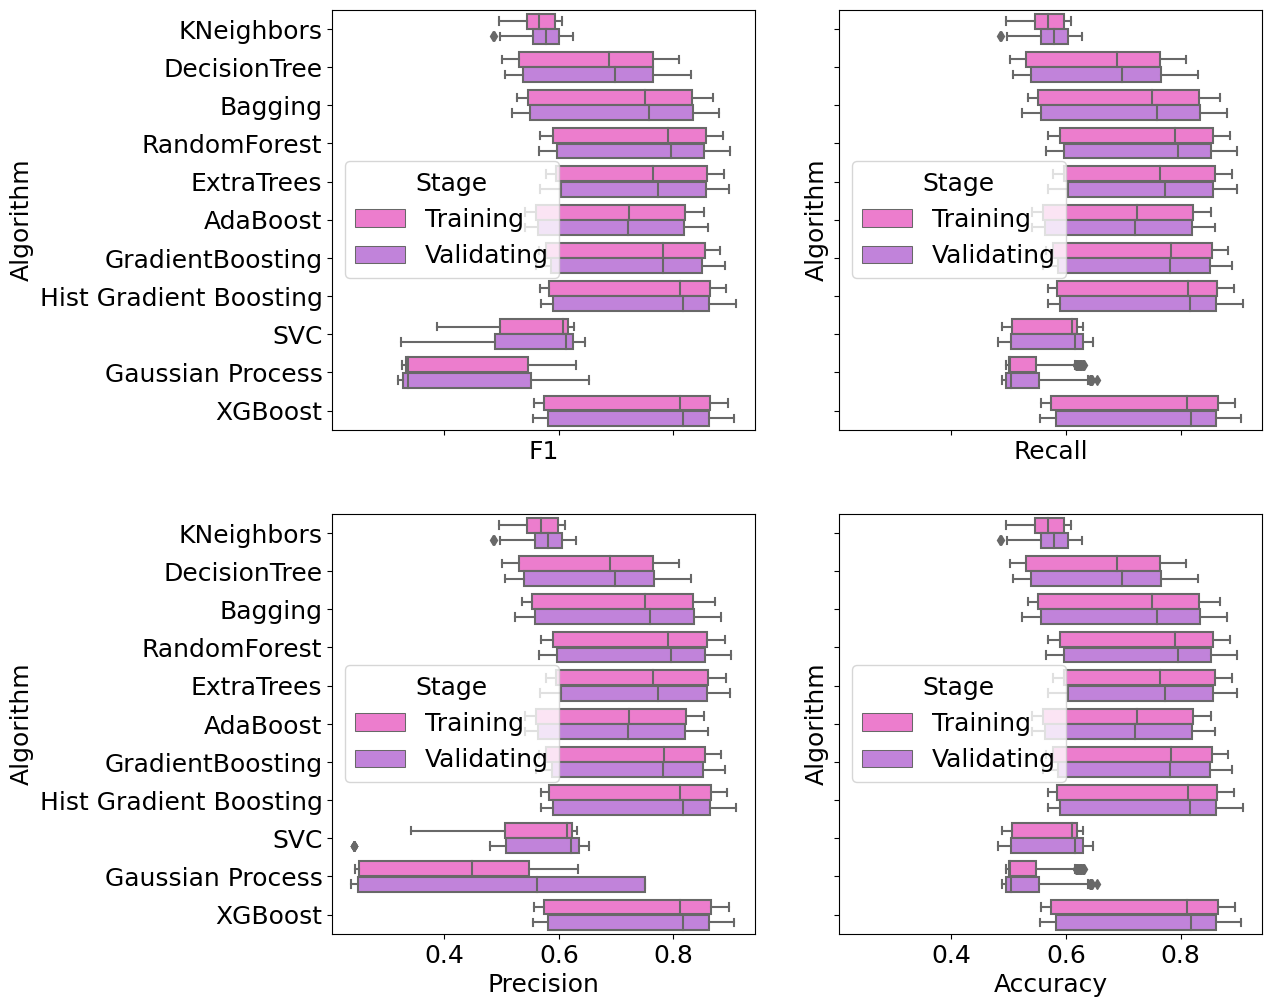

In [23]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

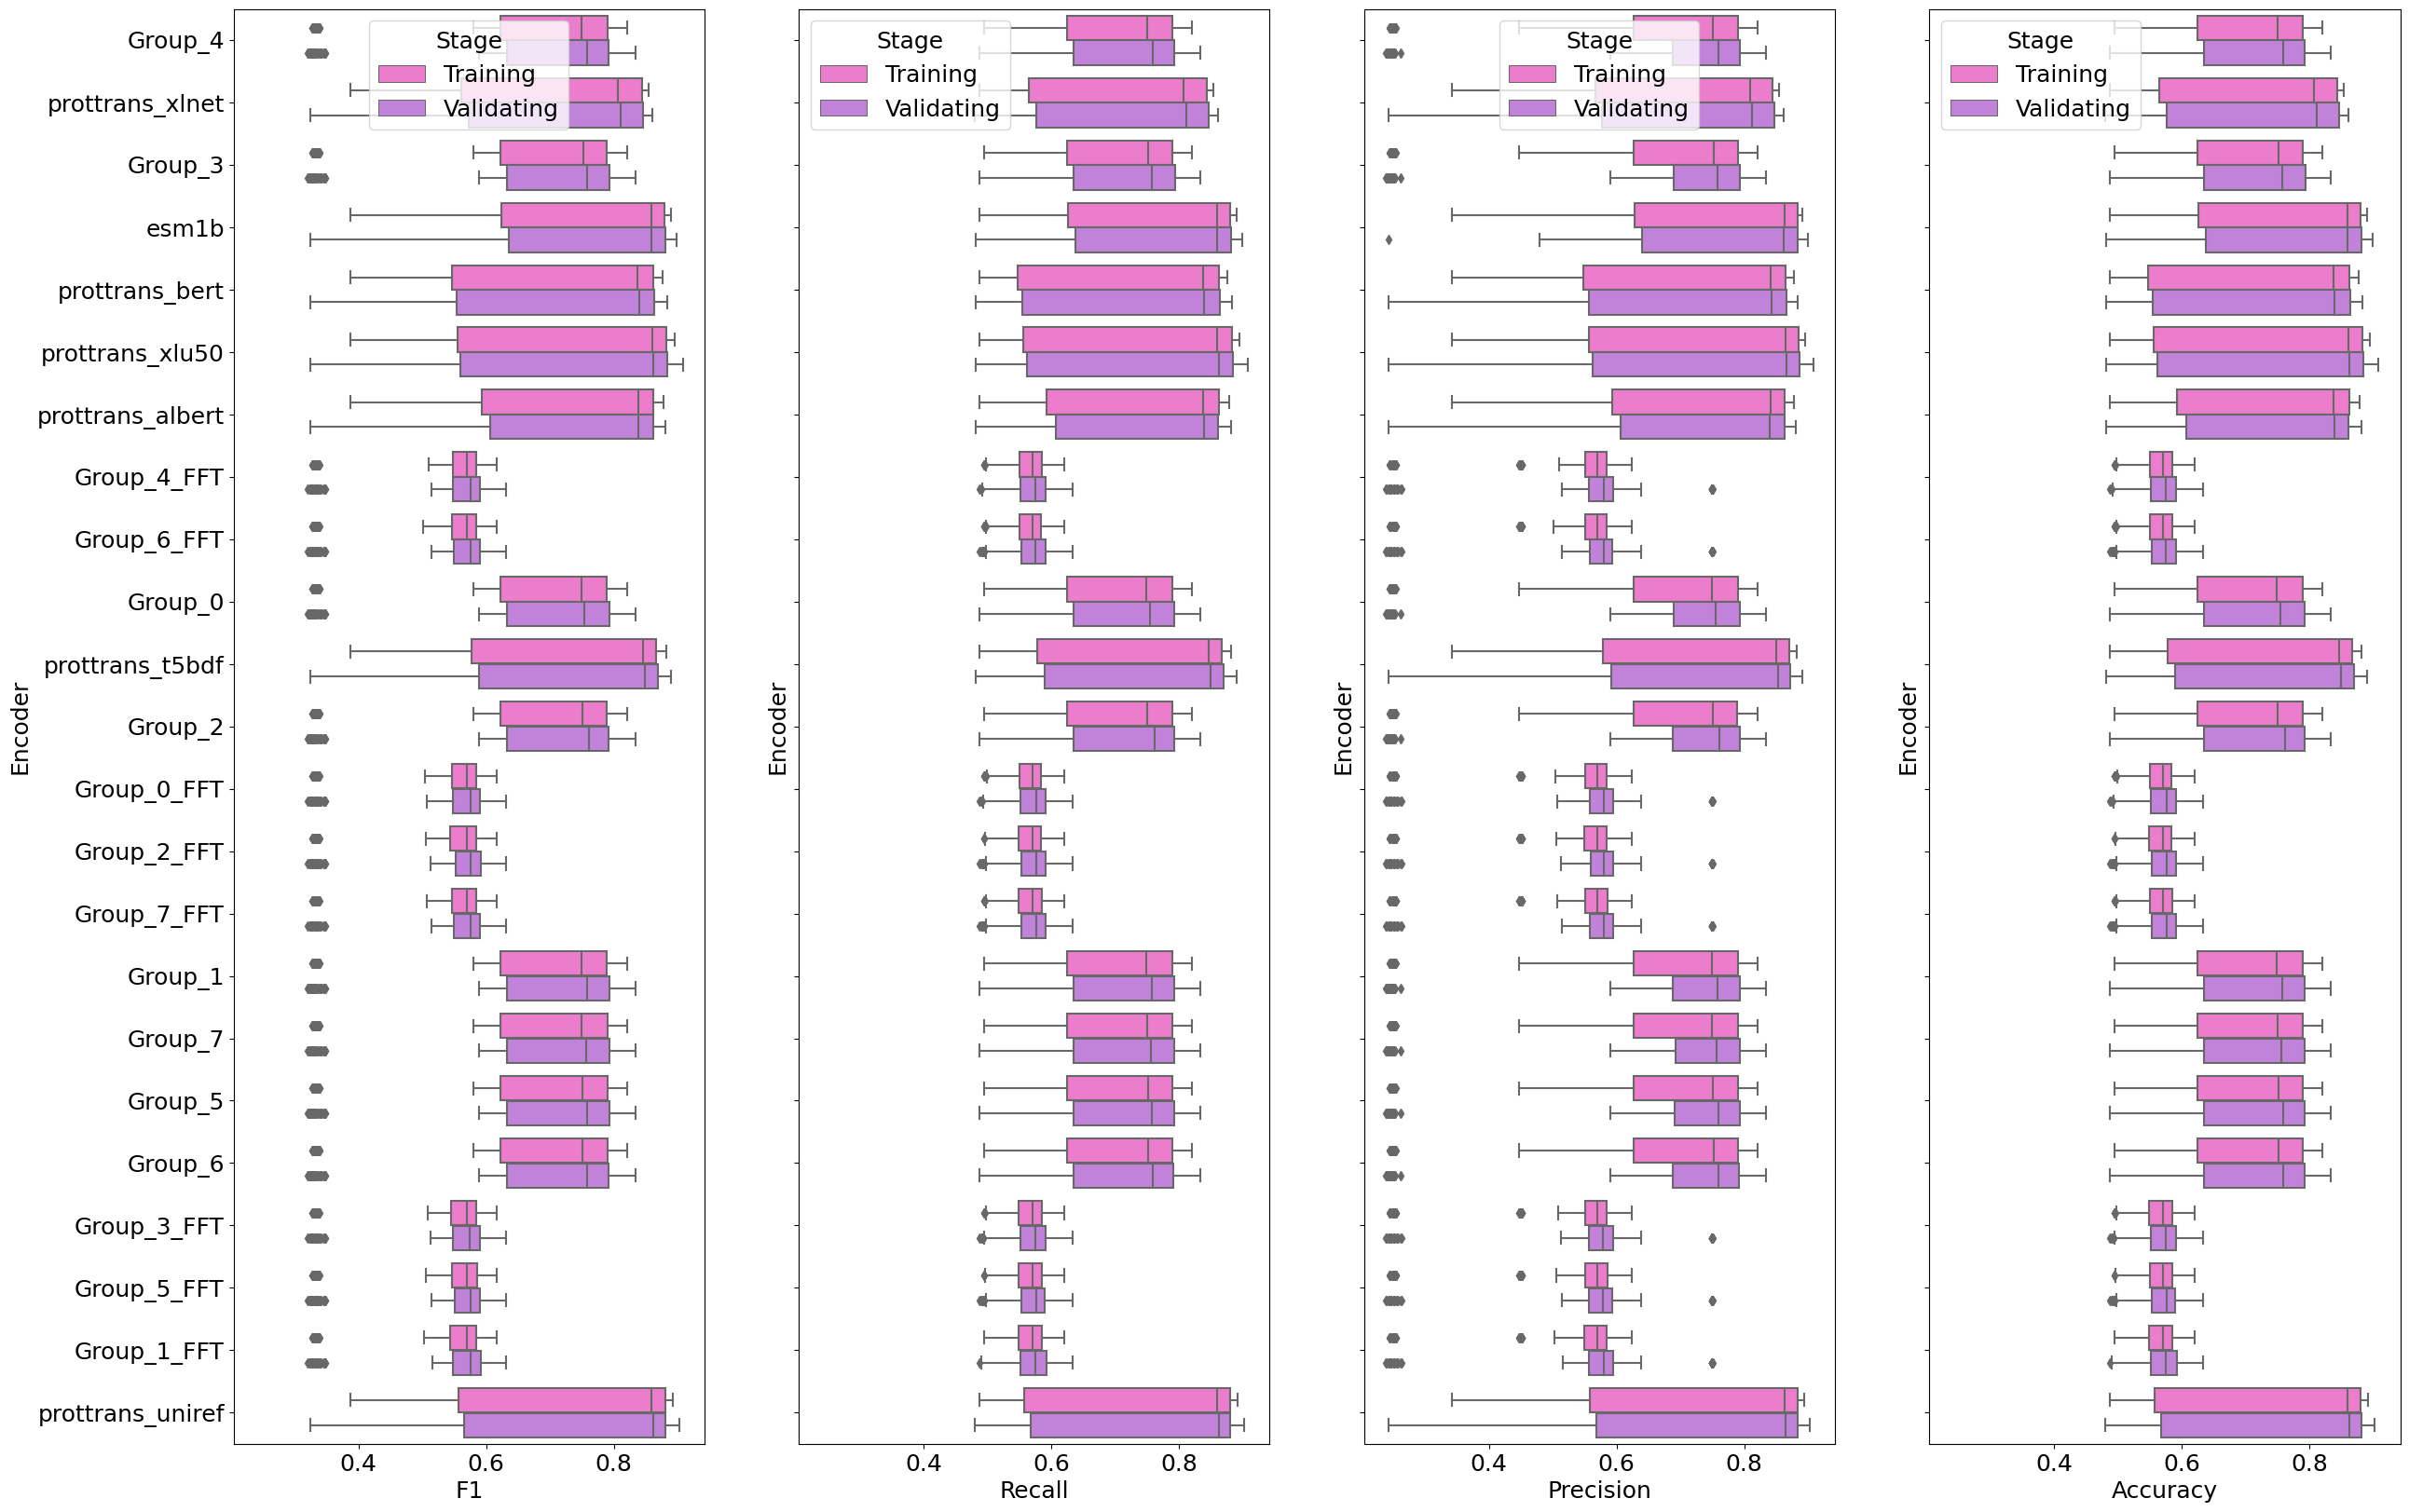

In [24]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

In [25]:
selection_instance = SelectionMethod()
df_selection = selection_instance.select(15, df_results_train, df_results_validation)
df_selection

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
91,ExtraTrees,prottrans_xlu50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
154,Hist Gradient Boosting,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
200,RandomForest,esm1b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
204,RandomForest,prottrans_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
250,XGBoost,prottrans_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
